In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data = pd.read_csv('kc_house_data.csv', index_col=0)
import seaborn as sns

In [77]:
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/09/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [78]:
data.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [79]:
data.shape

(21597, 20)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  int64  
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [81]:
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df['Yearsold'] = df['date'].dt.year


In [82]:
#df = pd.DataFrame(data)
columns_to_drop = ['date', 'sqft_basement']
df = df.drop(columns_to_drop, axis=1)

In [83]:
df.drop(['waterfront','view','zipcode','yr_renovated'],axis =1 ,inplace = True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  int64  
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   condition      21597 non-null  int64  
 7   grade          21597 non-null  int64  
 8   sqft_above     21597 non-null  int64  
 9   yr_built       21597 non-null  int64  
 10  lat            21597 non-null  float64
 11  long           21597 non-null  float64
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
 14  Yearsold       21597 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.6 MB


In [85]:
df.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,Yearsold
id,,,,,,,,,,,,,,,
263000018,360000,3,2.50,1530,1131,3.0,3,8,1530,2009,47.6993,-122.346,1530,1509,2014
6600060120,400000,4,2.50,2310,5813,2.0,3,8,2310,2014,47.5107,-122.362,1830,7200,2015
1523300141,402101,2,0.75,1020,1350,2.0,3,7,1020,2009,47.5944,-122.299,1020,2007,2014
291310100,400000,3,2.50,1600,2388,2.0,3,8,1600,2004,47.5345,-122.069,1410,1287,2015
1523300157,325000,2,0.75,1020,1076,2.0,3,7,1020,2008,47.5941,-122.299,1020,1357,2014


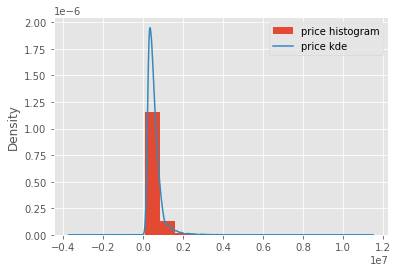

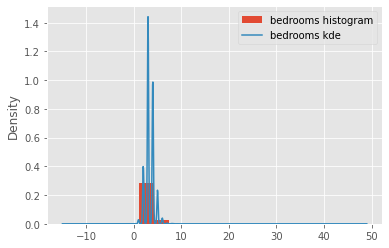

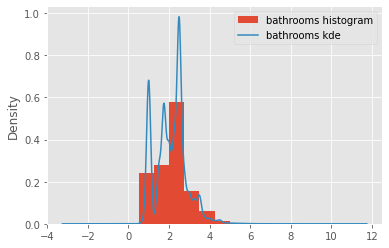

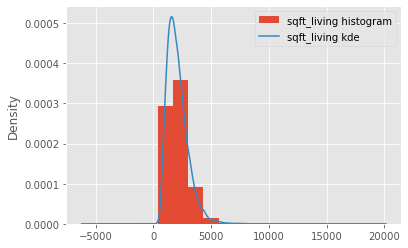

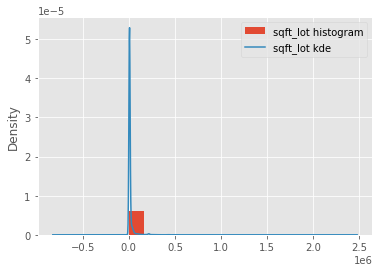

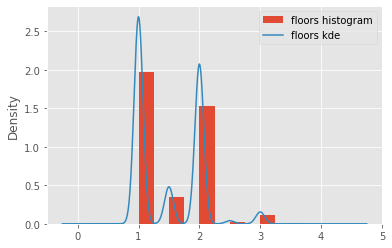

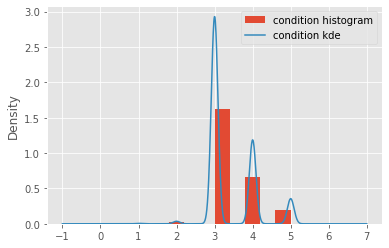

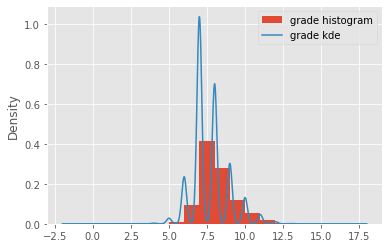

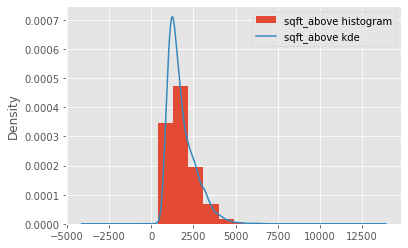

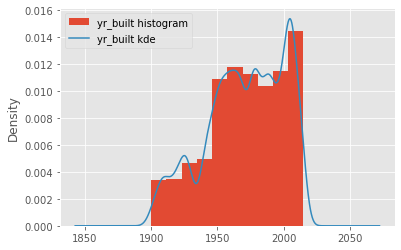

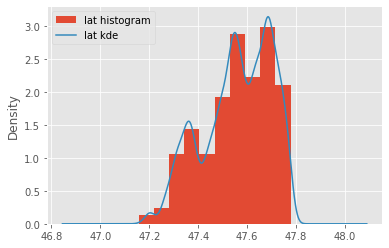

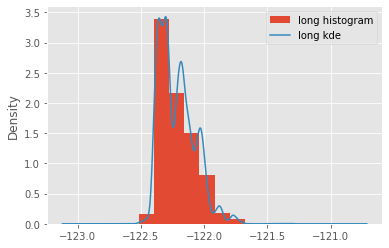

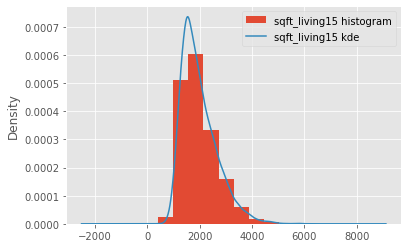

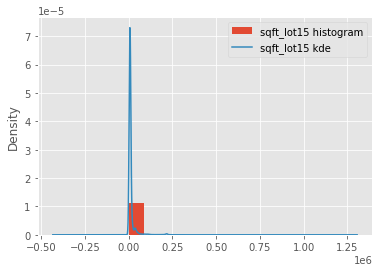

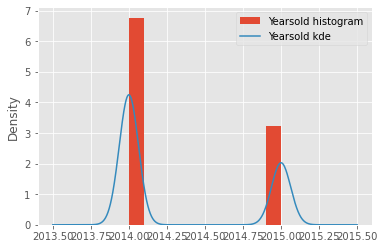

In [86]:
for column in df:
    data[column].plot.hist(density=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

In [87]:
df['age_house'] = df['Yearsold'] - df['yr_built']

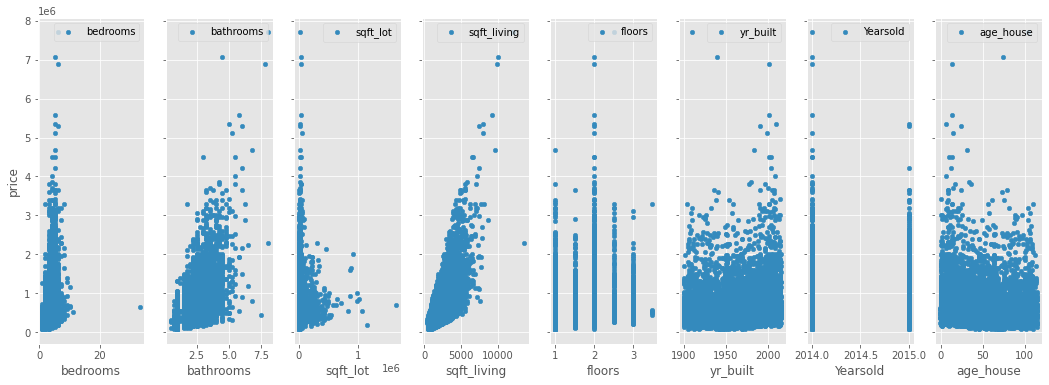

In [88]:
fig, axs = plt.subplots(1, 8, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_lot','sqft_living','floors','yr_built','Yearsold','age_house']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

In [89]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Yearsold', 'age_house'],
      dtype='object')

In [93]:
df["grade"].value_counts().reset_index()

,index,grade
0,7,8974
1,8,6065
2,9,2615
3,6,2038
4,10,1134
5,11,399
6,5,242
7,12,89
8,4,27
9,13,13


In [94]:
df["floors"].value_counts().reset_index()

,index,floors
0,1.0,10673
1,2.0,8235
2,1.5,1910
3,3.0,611
4,2.5,161
5,3.5,7


In [95]:
X = df.drop('price', axis=1)
y = df['price']

In [96]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                          1.261e+04
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:46:13   Log-Likelihood:                     -2.9589e+05
No. Observations:               21597   AIC:                                  5.918e+05
Df Residuals:                   21583   BIC:                                  5.919e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       -4.53e+04   2021.075    -22.411      0.000   -4.93e+04   -4.13e+04
bathrooms      4.871e+04   3470.104     14.036      0.000    4.19e+04    5.55e+04
sqft_living     177.8689      4.639     38.339      0.000     168.775     186.963
sqft_lot          0.1345      0.051      2.620      0.009       0.034       0.235
floors         9952.2272   3835.503      2.595      0.009    2434.358    1.75e+04
condition      2.789e+04   2466.177     11.311      0.000    2.31e+04    3.27e+04
grade          1.058e+05   2303.159     45.941      0.000    1.01e+05     1.1e+05
sqft_above        5.5756      4.598      1.213      0.225      -3.437      14.588
yr_built      -7496.1641    252.000    -29.747      0.000   -7990.102   -7002.226
lat            5.015e+05   1.11e+04     45.102      0.000     4.8e+05    5.23e+05
long          -1.175e+05   1.23e+04     -9.525      0.000   -1.42e+05   -9.34e+04
sqft_living15    39.6561      3.632     10.919      0.000      32.537      46.775
sqft_lot15       -0.3632      0.079     -4.622      0.000      -0.517      -0.209
Yearsold      -1.193e+04    529.752    -22.523      0.000    -1.3e+04   -1.09e+04
age_house     -4435.5319    281.829    -15.738      0.000   -4987.938   -3883.126
==============================================================================
Omnibus:                    19551.695   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1928523.329
Skew:                           3.981   Prob(JB):                         0.00
Kurtosis:                      48.604   Cond. No.                     2.98e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.23e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

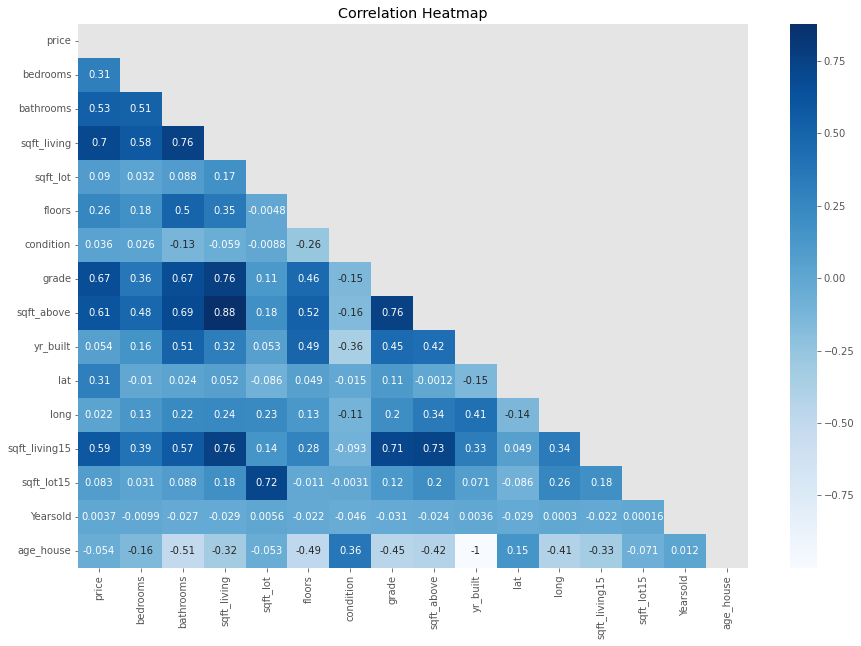

In [100]:
correlation_matrix = df.corr()
mask=np.triu(np.ones_like(correlation_matrix,dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,mask=mask, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [101]:
print(df['sqft_living'].corr(df['price']))
print(df['sqft_above'].corr(df['price']))
print(df['sqft_living'].corr(df['sqft_above']))

0.7019173021377595
0.6053679437051804
0.876447759035498


In [102]:
print(df['sqft_lot'].corr(df['price']))
print(df['sqft_lot15'].corr(df['price']))
print(df['condition'].corr(df['price']))

0.08987622099083864
0.08284493117496432
0.036056375486094944


In [103]:
print(df['sqft_living15'].corr(df['price']))
print(df['sqft_living'].corr(df['price']))
print(df['sqft_living'].corr(df['sqft_living15']))

0.5852412017040661
0.7019173021377595
0.7564015282474996


In [104]:
print(df['yr_built'].corr(df['price']))
print(df['Yearsold'].corr(df['price']))
print(df['long'].corr(df['price']))
print(df['age_house'].corr(df['price']))

0.053953333465191176
0.0037271396243154656
0.022036321104613392
-0.05389023991836023


In [105]:
df.drop(['sqft_above','sqft_living15','sqft_lot15','yr_built','Yearsold','condition','long','age_house',],axis=1,inplace=True)

In [106]:
X = df.drop('price', axis=1)
y = df['price']

In [107]:
import statsmodels.api as sm
model1 = sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                          2.042e+04
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:47:01   Log-Likelihood:                     -2.9933e+05
No. Observations:               21597   AIC:                                  5.987e+05
Df Residuals:                   21591   BIC:                                  5.987e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -7.704e+04   2079.967    -37.039      0.000   -8.11e+04    -7.3e+04
bathrooms   -5811.7359   3781.411     -1.537      0.124   -1.32e+04    1600.109
sqft_living   290.6676      3.122     93.109      0.000     284.549     296.787
sqft_lot       -0.4293      0.042    -10.122      0.000      -0.512      -0.346
floors      -4.004e+04   3830.256    -10.453      0.000   -4.75e+04   -3.25e+04
grade        3.658e+04   1211.433     30.194      0.000    3.42e+04     3.9e+04
==============================================================================
Omnibus:                    15738.592   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           662984.544
Skew:                           3.049   Prob(JB):                         0.00
Kurtosis:                      29.449   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
continuous = ['bedrooms','bathrooms','sqft_living', 'sqft_lot','price']
categoricals = ['floors','grade']


In [109]:
housing_cont = df[continuous]
log_names = [f'{column}_log' for column in housing_cont.columns]
housing_log = np.log(housing_cont)
housing_log.columns = log_names

In [110]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

housing_log_norm = housing_log.apply(normalize)

In [111]:
housing_ohe = pd.get_dummies(df[categoricals],drop_first=True) # prefix=5, drop_first=True)


In [112]:
preprocessed = pd.concat([housing_log_norm, housing_ohe], axis=1)
preprocessed.head()

,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,price_log,floors,grade
id,,,,,,,
7129300520,-0.279718,-1.726509,-1.125556,-0.388430,-1.401998,1.0,7
6414100192,-0.279718,0.339653,0.709446,-0.113241,0.279938,2.0,7
5631500400,-1.711611,-1.726509,-2.131893,0.244475,-1.799430,1.0,6
2487200875,0.736226,1.072635,0.070674,-0.523914,0.499698,1.0,7
1954400510,-0.279718,0.039555,-0.292725,0.008139,0.178434,1.0,8


In [113]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']


In [114]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model2 = sm.OLS(y,X_int).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     4569.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:47:12   Log-Likelihood:                -21792.
No. Observations:               21597   AIC:                         4.360e+04
Df Residuals:                   21590   BIC:                         4.365e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.8185      0.046    -60.711      0.000      -2.909      -2.727
bedrooms_log       -0.0856      0.006    -14.011      0.000      -0.098      -0.074
bathrooms_log      -0.0707      0.008     -9.247      0.000      -0.086      -0.056
sqft_living_log     0.4976      0.010     50.798      0.000       0.478       0.517
sqft_lot_log       -0.0971      0.005    -18.360      0.000      -0.107      -0.087
floors             -0.0958      0.011     -8.979      0.000      -0.117      -0.075
grade               0.3867      0.006     62.622      0.000       0.375       0.399
==============================================================================
Omnibus:                       62.987   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.489
Skew:                           0.133   Prob(JB):                     1.64e-14
Kurtosis:                       3.004   Cond. No.                         83.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [136]:
continuous_1 = ['bedrooms', 'bathrooms','sqft_living', 'sqft_lot']
categoricals_1 = ['floors', 'grade']

In [137]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15, random_state=1)

In [138]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [139]:
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)


In [140]:
log_transformer.fit(X_train[continuous_1])
ohe.fit(X_train[categoricals_1])

OneHotEncoder(drop='first', sparse=False)

In [141]:
# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous_1]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals_1]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous_1]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals_1]), index=X_test.index)
], axis=1)

In [142]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [143]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [144]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 57137891932.389755
Test Mean Squared Error:  54515090500.23665
